**Problem 2**

Recursive Variable Step Size Integrator

**Method 1**

(Code Referred from Lecture Notes)

In [45]:
import numpy as np

def integrate_adaptive(fun,a,b,tol,extra=None):
    if extra is None:
      extra=[]
    print('calling function from ',a,b)
    # Taking 5 points between the intervals a and b
    x = np.linspace(a,b,5)
    y = fun(x)              # True value of function

    # Simpson's 3 point and 5 point integral (1/3 Rule)
    dx = x[1]-x[0]
    i1 = (y[0]+4*y[2]+y[4])/3*(2*dx)
    i2 = (y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/3*dx

    error = np.abs(i1-i2)
    if error < tol:
        return i2
    else:
        mid = (a+b)/2
        int1 = integrate_adaptive(fun,a,mid,tol/2)
        int2 = integrate_adaptive(fun,mid,b,tol/2)
        return int1+int2
    print(count)

In [46]:
# Function Definition
def fun(x):
  return np.sin(x) 

ans = integrate_adaptive(fun,0.0,np.pi,1e-6)
print(' My Answer is ',ans, 'and my Error is', ans-2)

calling function from  0.0 3.141592653589793
calling function from  0.0 1.5707963267948966
calling function from  0.0 0.7853981633974483
calling function from  0.0 0.39269908169872414
calling function from  0.0 0.19634954084936207
calling function from  0.19634954084936207 0.39269908169872414
calling function from  0.39269908169872414 0.7853981633974483
calling function from  0.39269908169872414 0.5890486225480862
calling function from  0.5890486225480862 0.7853981633974483
calling function from  0.7853981633974483 1.5707963267948966
calling function from  0.7853981633974483 1.1780972450961724
calling function from  0.7853981633974483 0.9817477042468103
calling function from  0.7853981633974483 0.8835729338221293
calling function from  0.8835729338221293 0.9817477042468103
calling function from  0.9817477042468103 1.1780972450961724
calling function from  0.9817477042468103 1.0799224746714913
calling function from  1.0799224746714913 1.1780972450961724
calling function from  1.17809724

**Method 2**

The below code doesn't calls f(x) again for the same value of x

(Code and concept referred from Numerical integration/Adaptive Simpson's method by Rosetta Code Wikipedia)

In [47]:
import collections
triple = collections.namedtuple('triple', 'm fm simp')

def quad_simpsons_mem(f, a , fa, b, fb):

   # Evaluates Simpson's 1/3 Rule, also returning the value of m and f(m) to reuse

    m = a + (b - a) / 2
    fm = f(m)
    simp = abs(b - a) / 6 * (fa + 4*fm + fb)    # Simpson's 3 point formula
    return triple(m, fm, simp)
 
def quad_eval(f, a, fa, b, fb, eps, whole, m, fm):

    # Efficient recursive implementation of adaptive Simpson's rule where the function values at the start, middle, end of the intervals are retained.

    print('calling function from ',a,b)
    lt = quad_simpsons_mem(f, a, fa, m, fm)
    rt = quad_simpsons_mem(f, m, fm, b, fb)
    delta = lt.simp + rt.simp - whole
    if (abs(delta) <= eps * 15):
      return (lt.simp + rt.simp + delta/15)
    else:
      return (quad_eval(f, a, fa, m, fm, eps/2, lt.simp, lt.m, lt.fm) + quad_eval(f, m, fm, b, fb, eps/2, rt.simp, rt.m, rt.fm))
    
def quad_asr(f, a, b, eps):
  
    fa = f(a)
    fb = f(b)
    t = quad_simpsons_mem(f, a, fa, b, fb)
    return quad_eval(f, a, fa, b, fb, eps, t.simp, t.m, t.fm)

In [48]:
# Function Definition

def fun(x):
  return np.sin(x) 

ans = quad_asr(fun, 0, np.pi, 1e-06);
#print("Simpson's integration of sine from {} to {} = {}\n".format(a, b, sinx))
print(' My Answer is ',ans, 'and my Error is', ans-2)

calling function from  0 3.141592653589793
calling function from  0 1.5707963267948966
calling function from  0 0.7853981633974483
calling function from  0 0.39269908169872414
calling function from  0.39269908169872414 0.7853981633974483
calling function from  0.7853981633974483 1.5707963267948966
calling function from  0.7853981633974483 1.1780972450961724
calling function from  0.7853981633974483 0.9817477042468103
calling function from  0.9817477042468103 1.1780972450961724
calling function from  1.1780972450961724 1.5707963267948966
calling function from  1.1780972450961724 1.3744467859455345
calling function from  1.3744467859455345 1.5707963267948966
calling function from  1.5707963267948966 3.141592653589793
calling function from  1.5707963267948966 2.356194490192345
calling function from  1.5707963267948966 1.9634954084936207
calling function from  1.5707963267948966 1.7671458676442586
calling function from  1.7671458676442586 1.9634954084936207
calling function from  1.9634954

**Inference**

Comparing the above 2 methods, we see that methods 2 has called the function least number of times. This is achieved by storing the values at the start, middle and end of the interval and calling the function only to estimate the remaining points.

**Problem 1**

Electric Field from an infinitesimally thin spherical shell of charge '𝐐' with radius 'ℜ'. Make a plot of Electric Field from the shell as a function of distance from the distance

**Method 1** - Using Recursive step size Integrator

In [101]:
import numpy as np
from matplotlib import pyplot as plt

def integrate_adaptive(fun,a,b,tol):
    # Taking 10 points between the intervals a and b
    x = np.linspace(a,b,10)
    y = fun(x)              

    # Simpson's 3 point and 5 point integral (1/3 Rule)
    dx = x[1]-x[0]
    i1 = (y[0]+4*y[2]+y[4])/3*(2*dx)
    i2 = (y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/3*dx

    error = np.abs(i1-i2)
    if error < tol:
        return i2
    else:
        mid = (a+b)/2
        int1 = integrate_adaptive(fun,a,mid,tol/2)
        int2 = integrate_adaptive(fun,mid,b,tol/2)
        return int1+int2

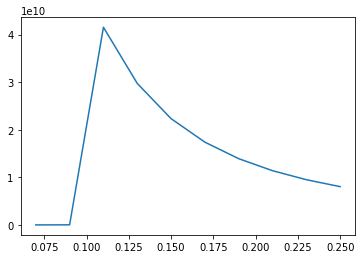

In [135]:
epsi = 8.85 * 10**(-12)           # Epsilon
r = 0.1                           # Radius                 
sigma = 1                         # Charge Density

def fun(x):
  # Electric Field Integral over theta ( 0 to pi )
  return (2*np.pi) / (4*np.pi*epsi) * ((sigma*(r**2)*np.sin(x)*(z-(r*np.cos(x))))) / ((r**2 + z**2 - 2*r*z*np.cos(x))**(3/2))

distance = np.linspace(0.07,0.25,10)
E = []
for i in distance:
  z = i
  E.append(integrate_adaptive(fun, 0, np.pi, 1e-2))

plt.plot(distance,E)
plt.show()

**Method 2** - Using Scipy's Quad Integrator

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  app.launch_new_instance()


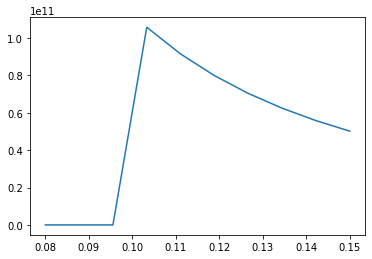

In [98]:
from scipy import integrate
from matplotlib import pyplot as plt

def f(x):     # Electric Field Integral

  return (2*np.pi) / (4*np.pi*epsi) * ((sigma*(r**2)*np.sin(x)*(z-(r*np.cos(x))))) / ((r**2 + z**2 - 2*r*z*np.cos(x))**(3/2))

epsi = 8.85 * 10**(-12)                # Epsilon
r = 0.1                                # Radius                 
sigma = 1                              # Charge Density
distance = np.linspace(0.08,0.15,10)   # Distance from the center of the sphere
E = []                            # Electric Field

for i in distance:
  z = i
  E.append(integrate.quad(f, 0, np.pi)[0])

plt.plot(distance,E)
plt.show()

**Inference**

The electric field inside the shell is zero, blows up at z = R (Due to singularity and reduces as the distance increases (outside the shell)

The same can be observed in the above graphs where the electric field is zero for the values of z below r, blows up at r = z and decreases as z increases for the value of z greater than r

I see that at z = 0.1, my integrator doesn't yeild the value (Due to singularity). But, the scipy,s quad integrator handles it

**Problem 3**

Fitting a Chebyshev Polynomial to model log base 2

In [56]:
import math
import numpy as np
from matplotlib import pyplot as plt

def mylog2(xfine):     # Defining the main Function that carries out the chebyshev Polynomial Fitting

  def fun(x):          # Defining the log base 2 function
    return math.log(x,2)

  x = np.linspace(0.5,1,10)
  y = []
  for i in x:
    y.append(fun(i))

  coeff = np.polynomial.chebyshev.chebfit(x, y, 15)    # Chebyshev Polynomial Fitting

  yfine = []
  for i in xfine:
    yfine.append(fun(i))

  y_pred = np.polynomial.chebyshev.chebval(xfine, coeff)

  print('The log base 2 for the given values are ',y_pred)
  plt.plot(x,y,label = 'True Value')
  plt.plot(xfine,y_pred,label='Estimated value')
  plt.legend()
  plt.show()
  print('My error is as below')
  plt.plot(xfine, yfine-y_pred)

The log base 2 for the given values are  [-1.00000000e+00 -9.26005235e-01 -8.55610507e-01 -7.88494628e-01
 -7.24365305e-01 -6.62965492e-01 -6.04071510e-01 -5.47487524e-01
 -4.93039831e-01 -4.40572806e-01 -3.89946752e-01 -3.41036687e-01
 -2.93730794e-01 -2.47927845e-01 -2.03534398e-01 -1.60464048e-01
 -1.18640803e-01 -7.80039439e-02 -3.84977811e-02  1.11022302e-16]


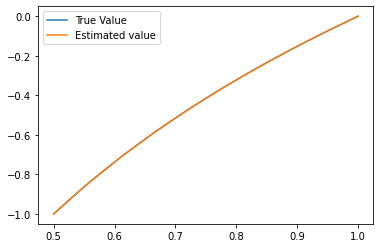

My error is as below


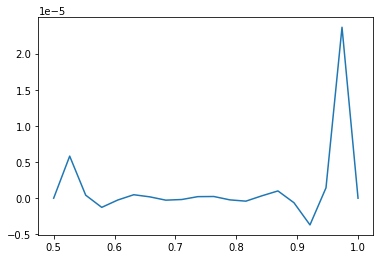

In [57]:
xfine = np.linspace(0.5,1,20)
mylog2(xfine)